In [1]:
import pandas as pd

### Sentiment Prediction Strategy 1: Word based scoring 
AFINN is a list of English words rated for valence with an integer
between minus five (negative) and plus five (positive). The words have
been manually labeled by Finn Årup Nielsen in 2009-2011. The file
is tab-separated. There are two versions:

AFINN-111: Newest version with 2477 words and phrases.

AFINN-96: 1468 unique words and phrases on 1480 lines. Note that there
are 1480 lines, as some words are listed twice. The word list in not
entirely in alphabetic ordering.  

An evaluation of the word list is available in:

Finn Årup Nielsen, "A new ANEW: Evaluation of a word list for
sentiment analysis in microblogs", http://arxiv.org/abs/1103.2903

https://github.com/fnielsen/afinn

Valence, as used in psychology, especially in discussing emotions, means the intrinsic attractiveness/"good"-ness (positive valence) or averseness/"bad"-ness (negative valence) of an event, object, or situation. ... For example, emotions popularly referred to as "negative", such as anger and fear, have negative valence.
    - source Wikipedia

In [2]:
!pip install afinn
from afinn import Afinn

In [3]:
afinnscore = Afinn()

In [19]:
print(afinnscore.score('Good'),afinnscore.score('Impressive'),afinnscore.score('more outstanding'),afinnscore.score('pathetic'))

3.0 3.0 5.0 -2.0


In [18]:
print(afinnscore.score('not too bad'),afinnscore.score('not pathetic'))

-3.0 -2.0


In [16]:
afinnscore.score('It is not good and impressive, outstanding and not pathetic')

4.0

In [21]:
afinnscore1 = Afinn(emoticons = True)

In [24]:
afinnscore1.score(':) :)')

4.0

In [25]:
afinnscore.score('neutral')

0.0

In [26]:
afinnscore.score('This bad worst sad good is utterly utterly excellent excellent excellent!')

4.0

In [27]:
afinnscore.score('This is BAD :)')

-3.0

In [28]:
afinnscore.score('This is worst and disgusting!!!!')

-6.0

In [29]:
afinnscore = Afinn(emoticons = True)

In [30]:
afinnscore.score('This is BAD :)')

-1.0

### Sentiment Prediction Strategy 2: Using popular package - Vader


**VADER (*V*alence *A*ware *D*ictionary and s*E*ntiment *R*easoner)**

is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.

In [31]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Sumit Kumar
[nltk_data]     Yadav\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [32]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [33]:
analyser = SentimentIntensityAnalyzer()

In [34]:
analyser.polarity_scores("this food is great and amazing and best. But bad for health")

{'neg': 0.234, 'neu': 0.394, 'pos': 0.372, 'compound': 0.2023}

In [35]:
analyser.polarity_scores('class is bad')

{'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5423}

In [40]:
analyser.polarity_scores('class is BAD BAD WORSE WORST BAD BAD WORSE WORST BAD BAD WORSE WORST BAD BAD WORSE WORST')

{'neg': 0.972, 'neu': 0.028, 'pos': 0.0, 'compound': -0.9973}

In [46]:
analyser.polarity_scores('class is BAD but the food was great. Batchmates were nice')

{'neg': 0.131, 'neu': 0.401, 'pos': 0.468, 'compound': 0.8287}

In [44]:
analyser.polarity_scores("class is BAD :'(")

{'neg': 0.788, 'neu': 0.212, 'pos': 0.0, 'compound': -0.8143}

In [45]:
analyser.polarity_scores("the great class is BAD :'(")

{'neg': 0.511, 'neu': 0.206, 'pos': 0.282, 'compound': -0.516}

In [47]:
analyser.polarity_scores("the great class is BAD :'(")['compound']

-0.516

In [ ]:
analyser.polarity_scores("this food is awfully GOOD")

In [ ]:
analyser.polarity_scores("this class is pretty ugly")

In [ ]:
analyser.polarity_scores("this class is pretty UGLY")

In [ ]:
analyser.polarity_scores("this class is pretty UGLY!")

In [ ]:
analyser.polarity_scores("this class is pretty UGLY! <3")

In [ ]:
analyser.polarity_scores("this class is pretty UGLY! :( ")

In [ ]:
analyser.polarity_scores("this food is GREAT and amazing and best. :)")

In [ ]:
analyser.polarity_scores("this food is terrible but healthy")

In [ ]:
analyser.polarity_scores("encourage killing")

In [ ]:
analyser.polarity_scores("this food is TERRIBLE")

In [ ]:
analyser.polarity_scores("this food is good")

In [ ]:
analyser.polarity_scores("this food is good!")

In [ ]:
analyser.polarity_scores("this food is good! <3")

In [ ]:
analyser.polarity_scores("this food is good?")

In [ ]:
analyser.polarity_scores("just heard the news :) :@")['compound']

In [ ]:
analyser.polarity_scores("just heard the news :@ ")

In [ ]:
analyser.polarity_scores("just heard the news smh")['compound']

In [ ]:
analyser.polarity_scores("just heard the news lol")

In [ ]:
analyser.polarity_scores("just heard the news :D")

In [ ]:
analyser.polarity_scores("just heard the news :(")

In [ ]:
analyser.polarity_scores("just heard the news :@")['compound']

In [ ]:
analyser.polarity_scores("the food is unhealthy but good in taste")['compound']

In [ ]:
analyser.polarity_scores("phone is good. battery is good. camera is bad")

In [48]:
with open("Mankibaat.txt",encoding='utf-8') as f:
    data = f.read()
data

'\ufeff1. October 3,  2014\n\n\nMy Dear Countryme\nToday is the holy festival of Vijay Dashami. My heartiest greetings on this occasion of Vijay Dashami to one and all.\nThrough the medium of radio, I would like to share few heartfelt thoughts with you today. And, I hope that not only today, this series of conversation may be carried out regularly in future. I will try my best, if possible, to take out time twice a month or even once to speak with you. In future, I have also decided that whenever I will speak to you, it would be on Sundays and time would be morning 11. In that way, it would be convenient for you too and I will feel contented with the fact that I am successful in sharing my thoughts with you.\nWe are celebrating the festival of Vijay Dashami today, which symbolises the triumph of Good over Evil. But one gentleman named Ganesh Venkatadari, a native of Mumbai, sent me a mail and has written to me that we must take a vow to eliminate ten bad habits from within ourselves on

In [50]:
import nltk

In [61]:
analyser.polarity_scores(data)

{'neg': 0.038, 'neu': 0.775, 'pos': 0.187, 'compound': 1.0}

In [52]:
from nltk.tokenize import sent_tokenize
listsent = sent_tokenize(data)

In [53]:
sentimentlist = []
for i in range(len(listsent)):
    sentimentlist.append(analyser.polarity_scores(listsent[i])['compound'])    

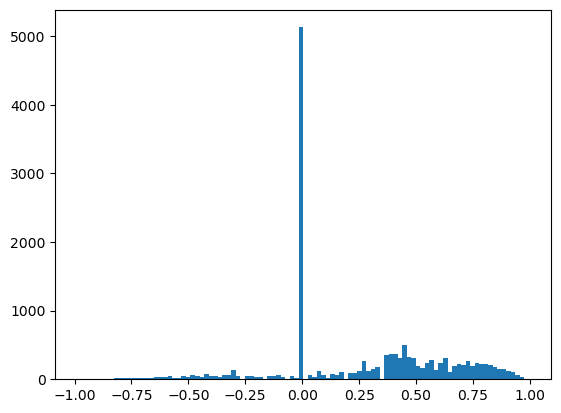

In [58]:
import matplotlib.pyplot as plt
plt.hist(sentimentlist,bins=100)
plt.show()

In [60]:
len(listsent)

15317

In [64]:
sentimentlistwithoutneutral = []
for i in range(len(listsent)):
    if sentimentlist[i]>=0.05 or sentimentlist[i]<=-0.05:
        sentimentlistwithoutneutral.append(sentimentlist[i])    

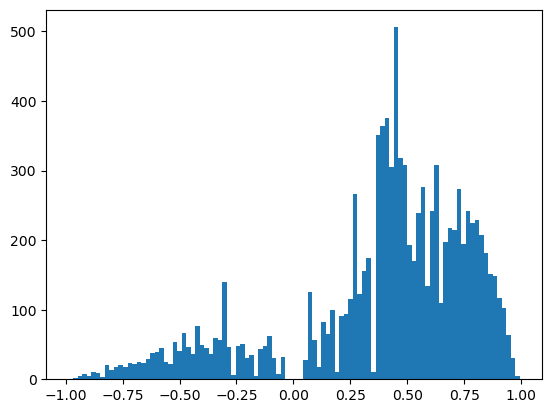

In [65]:
import matplotlib.pyplot as plt
plt.hist(sentimentlistwithoutneutral,bins=100)
plt.show()